In [1]:
import os
import pandas as pd

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_valid.csv')

# Filter out records without a valid local_filename
valid_indices = []
for i, filename in enumerate(dataset['local_filename']):
    if pd.isna(filename) or not os.path.exists(filename):
        continue
    valid_indices.append(i)

# Filter the dataset to only include valid records
valid_dataset = dataset.iloc[valid_indices]

# Save the filtered dataset as a new CSV file
valid_dataset.to_csv('fitzpatrick17k_filtered.csv', index=False)

# Print the number of removed records and the number of remaining records
num_removed = len(dataset) - len(valid_dataset)
print(f"Removed {num_removed} records with missing or invalid images.")
print(f"Remaining {len(valid_dataset)} records with valid images.")


Removed 0 records with missing or invalid images.
Remaining 16518 records with valid images.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_filtered.csv')

# Filter out records without an image
dataset = dataset.dropna(subset=['local_filename'])

# Check if all the images in the dataset are valid
valid_images = []
for local_filename in dataset['local_filename']:
    try:
        with Image.open(local_filename) as img:
            valid_images.append(True)
    except:
        valid_images.append(False)

print(f"All images are valid: {all(valid_images)}")


All images are valid: False


In [3]:
invalid_filenames = []
for filename in dataset['local_filename']:
    if os.path.exists(filename):
        # Check if the file is a valid image file
        try:
            img = Image.open(filename)
        except:
            invalid_filenames.append(filename)
    else:
        invalid_filenames.append(filename)

if invalid_filenames:
    print(f"Invalid images: {invalid_filenames}")
else:
    print("All images are valid.")


Invalid images: ['fitzpatrick_images\\psoriasis-pustular54.jpg']


In [4]:
import pandas as pd
import os
from PIL import Image

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_valid.csv')

# Filter out records without a valid local_filename
valid_indices = []
invalid_filenames = []
for i, filename in enumerate(dataset['local_filename']):
    if pd.isna(filename) or not os.path.exists(filename):
        continue
    # Check if the file is a valid image file
    try:
        img = Image.open(filename)
    except:
        invalid_filenames.append(filename)
        continue
    valid_indices.append(i)

# Filter the dataset to only include valid records
valid_dataset = dataset.iloc[valid_indices]

# Remove records with duplicate filenames
valid_dataset = valid_dataset.drop_duplicates(subset=['local_filename'])

# Save the filtered dataset as a new CSV file
valid_dataset.to_csv('fitzpatrick17k_filtered.csv', index=False)

# Print the number of removed records and the number of remaining records
num_removed = len(dataset) - len(valid_dataset)
print(f"Removed {num_removed} records with missing or invalid images, duplicate filenames, or other issues.")
print(f"Remaining {len(valid_dataset)} records with valid images and unique filenames.")

# Check if all images are valid
all_images_valid = True
for filename in valid_dataset['local_filename']:
    try:
        img = Image.open(filename)
    except:
        print(f"Invalid image: {filename}")
        all_images_valid = False

if all_images_valid:
    print("All images are valid")
else:
    print("Some images are invalid")
    print(f"Invalid images: {invalid_filenames}")


Removed 1 records with missing or invalid images, duplicate filenames, or other issues.
Remaining 16517 records with valid images and unique filenames.
All images are valid


In [7]:
import pandas as pd
from PIL import Image

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_filtered.csv')

# Check if all images in the dataset are valid
all_valid = True
invalid_images = []
for i, filename in enumerate(dataset['local_filename']):
    try:
        img = Image.open(filename)
        img.verify()
    except:
        all_valid = False
        invalid_images.append(filename)

if all_valid:
    print("All images in the dataset are valid.")
else:
    print(f"Invalid images: {invalid_images}")


All images in the dataset are valid.


In [9]:
import pandas as pd
from PIL import Image
import os

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_filtered.csv')

# Check if all images in the dataset are valid
valid_indices = []
invalid_images = []
for i, filename in enumerate(dataset['local_filename']):
    # Check if the image file exists
    if not os.path.exists(filename):
        invalid_images.append(filename)
        continue
    # Check if the file is a valid image file
    try:
        img = Image.open(filename)
        img.verify()
    except:
        invalid_images.append(filename)
        continue
    # Check if the file extension is valid
    if not filename.endswith(('.jpg', '.jpeg', '.png')):
        invalid_images.append(filename)
        continue
    valid_indices.append(i)

# Filter the dataset to only include valid records
valid_dataset = dataset.iloc[valid_indices]

# Save the filtered dataset as a new CSV file
valid_dataset.to_csv('fitzpatrick17k_validated.csv', index=False)

if len(invalid_images) > 0:
    print(f"Invalid images: {invalid_images}")
else:
    print("All images in the dataset are valid.")


Invalid images: ['fitzpatrick_images\\img_imageId=2409', 'fitzpatrick_images\\img_imageId=5060', 'fitzpatrick_images\\img_imageId=4898', 'fitzpatrick_images\\img_imageId=7598', 'fitzpatrick_images\\img_imageId=2969', 'fitzpatrick_images\\img_imageId=2398', 'fitzpatrick_images\\img_imageId=7721', 'fitzpatrick_images\\img_imageId=1423', 'fitzpatrick_images\\img_imageId=4078', 'fitzpatrick_images\\img_imageId=2368', 'fitzpatrick_images\\img_imageId=1302', 'fitzpatrick_images\\img_imageId=2968', 'fitzpatrick_images\\img_imageId=6907', 'fitzpatrick_images\\img_imageId=2421', 'fitzpatrick_images\\img_imageId=6716', 'fitzpatrick_images\\img_imageId=5893', 'fitzpatrick_images\\img_imageId=2221', 'fitzpatrick_images\\img_imageId=8259', 'fitzpatrick_images\\img_imageId=8845', 'fitzpatrick_images\\img_imageId=4637', 'fitzpatrick_images\\img_imageId=6538', 'fitzpatrick_images\\img_imageId=3214', 'fitzpatrick_images\\img_imageId=1981', 'fitzpatrick_images\\img_imageId=3043', 'fitzpatrick_images\\im

All images in the dataset are valid.


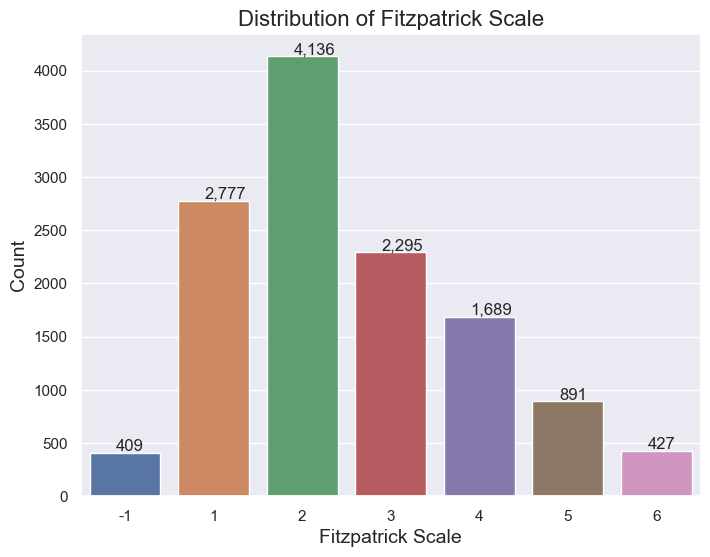

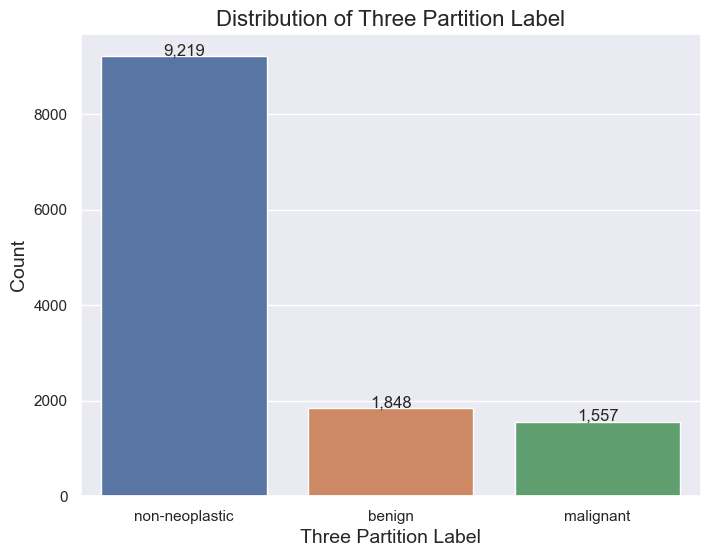

In [11]:
import pandas as pd
from PIL import Image
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_validated.csv')

# Check if all images in the dataset are valid
all_valid = True
invalid_images = []
for i, filename in enumerate(dataset['local_filename']):
    try:
        img = Image.open(filename)
        img.verify()
    except:
        all_valid = False
        invalid_images.append(filename)

if all_valid:
    print("All images in the dataset are valid.")
else:
    print(f"Invalid images: {invalid_images}")
    
# Create countplot for Fitzpatrick scale
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="fitzpatrick_scale", data=dataset)
ax.set_title('Distribution of Fitzpatrick Scale', fontsize=16)
ax.set_xlabel('Fitzpatrick Scale', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+20))
plt.show()

# Create countplot for three_partition_label
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="three_partition_label", data=dataset)
ax.set_title('Distribution of Three Partition Label', fontsize=16)
ax.set_xlabel('Three Partition Label', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+20))
plt.show()


In [15]:
import os
import pandas as pd

dataset = pd.read_csv('fitzpatrick17k_validated.csv')

# Get the unique file extensions in the dataset
unique_extensions = set()
for filename in dataset['local_filename']:
    extension = os.path.splitext(filename)[1]
    unique_extensions.add(extension.lower())

print("Unique file extensions in the dataset:", unique_extensions)


Unique file extensions in the dataset: {'.jpg'}


In [16]:
from PIL import Image
import pandas as pd
import os

dataset = pd.read_csv('fitzpatrick17k_validated.csv')

valid_images = []
invalid_images = []
for filename in dataset['local_filename']:
    try:
        img = Image.open(filename)
        img.verify()
        valid_images.append(filename)
    except (IOError, SyntaxError) as e:
        invalid_images.append(filename)

print(f"Total images: {len(dataset)}")
print(f"Valid images: {len(valid_images)}")
print(f"Invalid images: {len(invalid_images)}")

if len(invalid_images) > 0:
    print(f"Invalid images: {invalid_images}")


Total images: 12624
Valid images: 12624
Invalid images: 0


In [21]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_validated.csv')

# Filter out records with fitzpatrick_scale value of -1
valid_mask = dataset['fitzpatrick_scale'] != -1
final_dataset = dataset[valid_mask]

# Save the filtered dataset as a new CSV file
final_dataset.to_csv('final_dataset.csv', index=False)

# Print the number of removed records and the number of remaining records
num_removed = len(dataset) - len(final_dataset)
print(f"Removed {num_removed} records with fitzpatrick_scale value of -1.")
print(f"Remaining {len(final_dataset)} records with valid fitzpatrick_scale values.")


Removed 409 records with fitzpatrick_scale value of -1.
Remaining 12215 records with valid fitzpatrick_scale values.


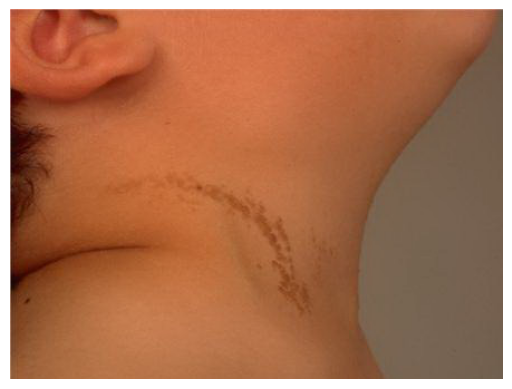

Fitzpatrick Scale: 2



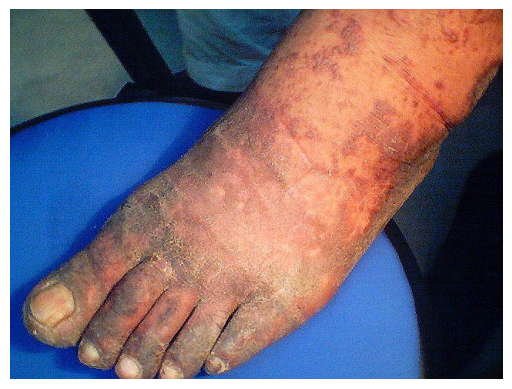

Fitzpatrick Scale: 4



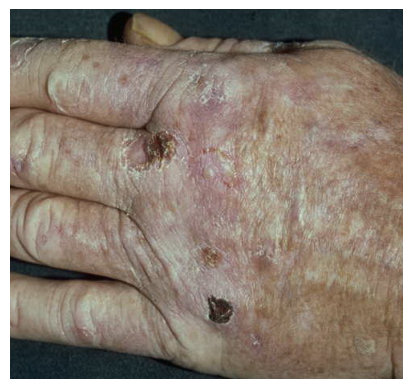

Fitzpatrick Scale: 1



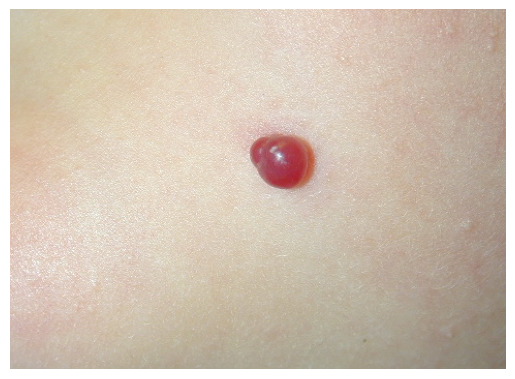

Fitzpatrick Scale: 1



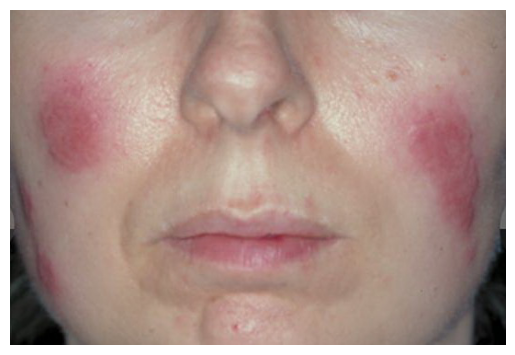

Fitzpatrick Scale: 1



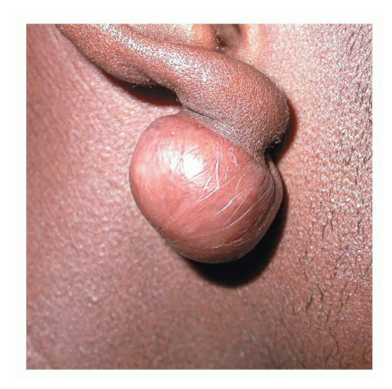

Fitzpatrick Scale: 5



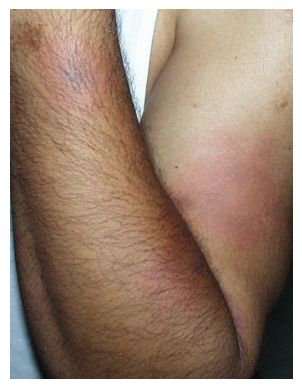

Fitzpatrick Scale: 4



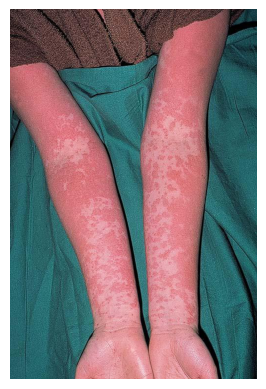

Fitzpatrick Scale: 2



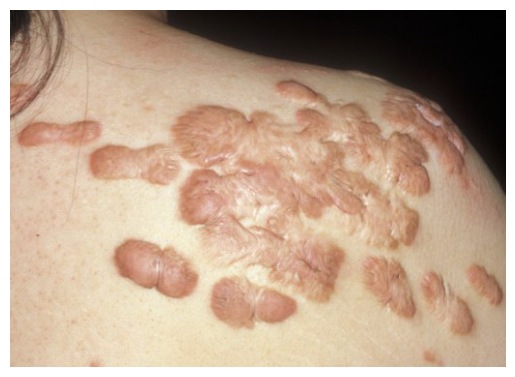

Fitzpatrick Scale: 2



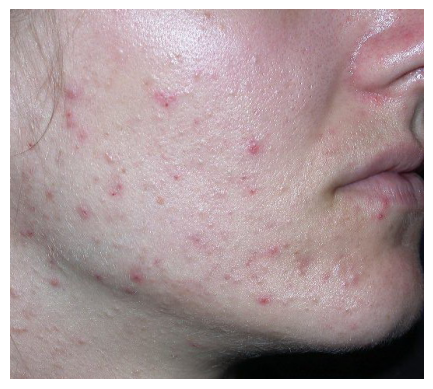

Fitzpatrick Scale: 1



In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the final_dataset
final_dataset = pd.read_csv('final_dataset.csv')

# Define a function to display an image given a filename
def show_image(filename):
    img = Image.open(filename)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Show some random images from the final_dataset
num_images_to_show = 10
sample_images = final_dataset.sample(num_images_to_show)
for i, row in sample_images.iterrows():
    show_image(row['local_filename'])
    print(f"Fitzpatrick Scale: {row['fitzpatrick_scale']}\n")


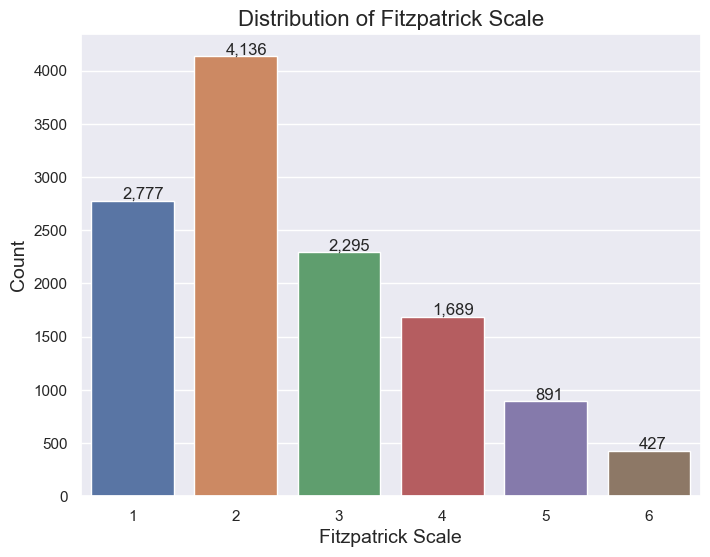

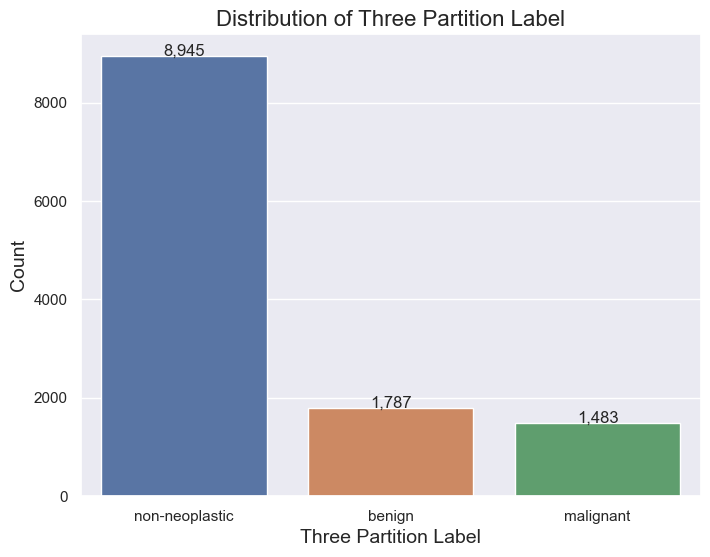

In [25]:
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('final_dataset.csv')

# Create countplot for Fitzpatrick scale
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="fitzpatrick_scale", data=df)
ax.set_title('Distribution of Fitzpatrick Scale', fontsize=16)
ax.set_xlabel('Fitzpatrick Scale', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+20))
plt.show()

# Create countplot for three_partition_label
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="three_partition_label", data=df)
ax.set_title('Distribution of Three Partition Label', fontsize=16)
ax.set_xlabel('Three Partition Label', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x()+0.3, p.get_height()+20))
plt.show()